In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/추천시스템/Recipy Recommendation/data/'

In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

# Original Data

In [ ]:
recipes = pd.read_csv(path + 'RAW_recipes.csv')

In [ ]:
interactions = pd.read_csv(path + 'RAW_interactions.csv')

In [ ]:
recipes.shape

(231637, 12)

In [ ]:
interactions.shape

(1132367, 5)

In [ ]:
recipes.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')

In [ ]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


# Recipe Dataset Preprocessing

#### Recipe와 Interaction 간 User Id 간 일치 확인 및 불일치 값 제거

In [ ]:
# recipes와 interactions 간의 id 불일치 확인
discrepancies_in_recipes = recipes[~recipes['id'].isin(interactions['recipe_id'])]
discrepancies_in_interactions = interactions[~interactions['recipe_id'].isin(recipes['id'])]

In [ ]:
# 불일치하는 데이터 삭제
recipes = recipes[recipes['id'].isin(interactions['recipe_id'])]
interactions = interactions[interactions['recipe_id'].isin(recipes['id'])]

#### 영양성분 정보 추가

In [ ]:
recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = recipes.nutrition.str.split(",",expand=True)

In [ ]:
recipes['calories'] =  recipes['calories'].apply(lambda x: x.replace('[',''))

In [ ]:
recipes['carbohydrates (PDV)'] =  recipes['carbohydrates (PDV)'].apply(lambda x: x.replace(']',''))

In [ ]:
recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = recipes[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')

#### 불필요한 column 제거

In [ ]:
recipes.drop(['contributor_id','submitted','nutrition'], axis=1,inplace = True)

#### food type column 추가 및 작업

In [ ]:
recipes['food_types'] = np.nan
recipes['food_types'] = recipes['food_types'].astype('str')

In [ ]:
for i in recipes['ingredients'].index:
    if('eggs' not in recipes['ingredients'][i]):
         if('ice-cream' in recipes['ingredients'][i] or 'chocolate' in recipes['ingredients'][i] or 'cookies' in recipes['ingredients'][i]):
                recipes['food_types'][i]='Veg dessert'
    elif('eggs' in recipes['ingredients'][i]):
        if('ice-cream' in recipes['ingredients'][i] or 'chocolate' in recipes['ingredients'][i] or 'cookies' in recipes['ingredients'][i]):
                recipes['food_types'][i]='Non-Veg dessert'

<ipython-input-19-829901c9ea2b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['food_types'][i]='Veg dessert'
<ipython-input-19-829901c9ea2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['food_types'][i]='Non-Veg dessert'


In [ ]:
for i in recipes.index:
    if(recipes['food_types'][i]!='Veg dessert' and recipes['food_types'][i]!='Non-Veg dessert' and 20<recipes['calories'][i]<300):
        recipes['food_types'][i]='Healthy'

<ipython-input-20-bf655b77d42f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['food_types'][i]='Healthy'


In [ ]:
for i in recipes.index:
    if(recipes['food_types'][i]!='Veg dessert' and recipes['food_types'][i]!='Non-Veg dessert' and recipes['food_types'][i]!='Healthy'):
        if('chicken' in recipes['ingredients'][i] or 'eggs' in recipes['ingredients'][i] or'ham' in recipes['ingredients'][i] or 'pepperoni' in recipes['ingredients'][i] ):
            recipes['food_types'][i]='Non-veg'

<ipython-input-21-4c86433c1228>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['food_types'][i]='Non-veg'


In [ ]:
for i in recipes.index:
    if(recipes['food_types'][i]!='Veg dessert' and recipes['food_types'][i]!='Non-Veg dessert' and recipes['food_types'][i]!='Healthy' and recipes['food_types'][i]!='Non-veg'):
        recipes['food_types'][i]='Veg'

<ipython-input-22-b691315a018f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['food_types'][i]='Veg'


In [ ]:
recipes['food_types'].value_counts()

Healthy            100579
Veg                 70416
Non-veg             45948
Veg dessert          9532
Non-Veg dessert      5162
Name: food_types, dtype: int64

In [ ]:
recipes['food_types'].isnull().sum()

0

In [ ]:
recipes.head()

,name,id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),food_types
0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,Healthy
1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,Healthy
2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,Healthy
3,alouette potatoes,59389,45,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,Veg
4,amish tomato ketchup for canning,44061,190,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,Veg


In [ ]:
recipes.rename(columns={'id': 'recipe_id'}, inplace=True)

In [ ]:
# recipes.to_csv(path + 'recipes_foodtype.csv', index=False, encoding='utf-8')

# Used Data

In [ ]:
recipes = pd.read_csv(path + 'recipes_foodtype.csv')

In [ ]:
interactions = pd.read_csv(path + 'RAW_interactions.csv')

## Recipes


In [ ]:
recipes.columns

Index(['name', 'recipe_id', 'minutes', 'tags', 'n_steps', 'steps',
       'description', 'ingredients', 'n_ingredients', 'calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)', 'food_types'],
      dtype='object')

In [ ]:
recipes.head()

,name,recipe_id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),food_types
0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,Healthy
1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,Healthy
2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,Healthy
3,alouette potatoes,59389,45,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,Veg
4,amish tomato ketchup for canning,44061,190,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,Veg


## Interactions

In [ ]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [ ]:
# 필요한 열만 취하기
rating_df = interactions.iloc[:,[0,1,3,4]]

In [ ]:
# Min-Max Scaling
rating_df['rating'] = (interactions['rating'])/5

<ipython-input-10-153ced8291a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['rating'] = (interactions['rating'])/5


In [ ]:
rating_df.head()

,user_id,recipe_id,rating,review
0,38094,40893,0.8,Great with a salad. Cooked on top of stove for...
1,1293707,40893,1.0,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,0.8,This worked very well and is EASY. I used not...
3,126440,85009,1.0,I made the Mexican topping and took it to bunk...
4,57222,85009,1.0,"Made the cheddar bacon topping, adding a sprin..."


# Encoding

In [ ]:
user_ids = rating_df['user_id'].unique()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
rating_df['user'] = rating_df['user_id'].map(user2user_encoded)
n_users = len(user2user_encoded)

recipe_ids = rating_df['recipe_id'].unique()
recipe2recipe_encoded = {x: i for i, x in enumerate(recipe_ids)}
rating_df['recipe'] = rating_df['recipe_id'].map(recipe2recipe_encoded)
n_recipes = len(recipe2recipe_encoded)

In [ ]:
print("Num of users: {}, Num of recipes: {}".format(n_users, n_recipes))
print("Min rating: {}, Max rating: {}".format(min(interactions['rating']), max(interactions['rating'])))

Num of users: 226570, Num of recipes: 231637
Min rating: 0, Max rating: 5


# Train Test set Split

In [ ]:
from sklearn.model_selection import train_test_split

# Shuffling
rating_df = rating_df.sample(frac=1, random_state=2018150446)

# feature, target 분리
X = rating_df[['user', 'recipe']].values
y = rating_df['rating'].values

# Train 및 Test 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018150446)

print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_test)))

# Train, Test 데이터 numpy 배열 변환
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

> Train set ratings: 792656
> Test set ratings: 339711


In [ ]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch.utils.data as data
import torchvision as tv
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X_train_tensor = torch.as_tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.as_tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.as_tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.as_tensor(y_test, dtype=torch.float32).to(device)

In [ ]:
print(device)
X_train_tensor_user = X_train_tensor[:,0].long()
X_train_tensor_recipe = X_train_tensor[:,1].long()
X_test_tensor_user = X_test_tensor[:,0].long()
X_test_tensor_recipe = X_test_tensor[:,1].long()

cuda


# Model Building

Recommendation Model

In [ ]:
class RecommenderNet(nn.Module):
    def __init__(self, n_users, n_recipes, embedding_size=128):
        super(RecommenderNet, self).__init__()
        self.user_embedding = nn.Embedding(n_users, embedding_size)
        self.recipe_embedding = nn.Embedding(n_recipes, embedding_size)
        self.fc = nn.Linear(embedding_size * 2, 1)
        self.out = nn.Sigmoid()

    def forward(self, user, recipe):
        user_embedded = self.user_embedding(user)
        recipe_embedded = self.recipe_embedding(recipe)
        x = torch.cat([user_embedded, recipe_embedded], dim=-1)
        x = self.fc(x.view(x.size(0), -1))
        return self.out(x)

* Dataloader, Loss Fuction, Optimizer, Scheduler 설정

In [ ]:
batch_size = 128

train_data = TensorDataset(X_train_tensor_user, X_train_tensor_recipe, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_data = TensorDataset(X_test_tensor_user, X_test_tensor_recipe, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


start_lr = 0.01
min_lr = 0.0001
max_lr = 0.1



rampup_epochs = 5
sustain_epochs = 0
exp_decay = .85

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr

In [ ]:
# model, loss 함수, optimizer, scheduler 초기화
model = RecommenderNet(n_users, n_recipes).to('cuda')
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=start_lr)
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lrfn)

# 체크포인트 저장 경로
checkpoint_filepath = '/content/drive/MyDrive/추천시스템/Recipy Recommendation/weights.pth'


# 학습 루프
train_losses, test_losses = [], []
best_loss = float('inf')
patience_counter = 0

# Training

In [ ]:
for epoch in range(10):
    model.train()
    total_train_loss = 0
    for user, recipe, rating in train_loader:
        user, recipe, rating = user.to('cuda'), recipe.to('cuda'), rating.to('cuda')

        optimizer.zero_grad()
        outputs = model(user, recipe)
        outputs = outputs.squeeze()
        loss = criterion(outputs, rating)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # 검증 부분
    model.eval()
    total_test_loss = 0
    with torch.no_grad():
        for user, recipe, rating in test_loader:
            user, recipe, rating = user.to('cuda'), recipe.to('cuda'), rating.to('cuda')
            outputs = model(user, recipe)
            outputs = outputs.squeeze()
            loss = criterion(outputs, rating)
            total_test_loss += loss.item()

    avg_test_loss = total_test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss}, Test Loss: {avg_test_loss}')

    # 학습률 업데이트
    scheduler.step()

    if avg_test_loss < best_loss :
      best_loss = avg_test_loss
      checkpoint = {
          'epoch' : epoch + 1,
          "state_dict" : model.state_dict(),
          "optimizer" : optimizer.state_dict(),
          "loss" : best_loss,
          "train_loss_history" : train_losses,
          "test_loss_history" : test_losses,
          "model_architecture" : str(model)
      }
      torch.save(checkpoint, checkpoint_filepath)
      patience_counter = 0

    else :
      patience_counter += 1

    # 조기 종료
    if patience_counter >= 3:
        break

# 모델 가중치 및 체크포인트 불러오기
checkpoint = torch.load(checkpoint_filepath)
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

Epoch 1, Train Loss: 0.5545490020487548, Test Loss: 0.4468276676551327
Epoch 2, Train Loss: 0.3704818821041915, Test Loss: 0.3472856733872195
Epoch 3, Train Loss: 0.3344923123084496, Test Loss: 0.34009982397346095
Epoch 4, Train Loss: 0.3168303422496293, Test Loss: 0.33975874415873225
Epoch 5, Train Loss: 0.2984846111031509, Test Loss: 0.34445480915304405
Epoch 6, Train Loss: 0.2808288476390329, Test Loss: 0.35416449764189006
Epoch 7, Train Loss: 0.26171604981960245, Test Loss: 0.3667949811354021


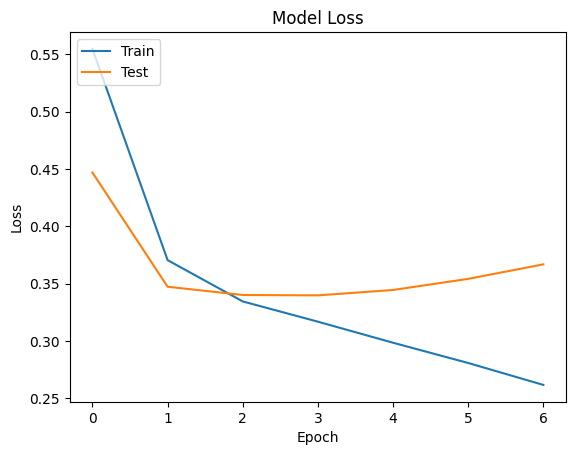

In [ ]:
#Training results
plt.plot(train_losses)
plt.plot(test_losses)
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

Embedding Layer의 가중치를 추출하고 정규화

In [ ]:
model = RecommenderNet(n_users, n_recipes)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=start_lr)
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lrfn)

checkpoint_filepath = '/content/drive/MyDrive/추천시스템/Recipy Recommendation/weights.pth'

checkpoint = torch.load('/content/drive/MyDrive/추천시스템/Recipy Recommendation/weights.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])
start_epoch = checkpoint['epoch']
best_loss = checkpoint['loss']
train_losses = checkpoint['train_loss_history']
test_losses = checkpoint['test_loss_history']

Extracting weights from model

In [ ]:
def extract_weights(name, model):
    weight_layer = getattr(model, name)
    weights = weight_layer.weight.data
    norm = weights.norm(p=2, dim=1, keepdim=True)
    normalized_weights = weights.div(norm)
    return normalized_weights

# 모델에서 가중치 추출
recipe_weights = extract_weights('recipe_embedding', model)
user_weights = extract_weights('user_embedding', model)

In [ ]:
checkpoint = torch.load(checkpoint_filepath)
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

# Recommendation Building Test

In [ ]:
# Recipe ID나 이름을 입력으로 받아 해당하는 Recipe 정보가 담긴 DataFrame을 반환
def getRecipeFrame(recipe):
    if isinstance(recipe, int):
        return df1[df1.recipe_id == recipe]
    if isinstance(recipe, str):
        return df1[df1.name == recipe]

In [ ]:
df1 = recipes

In [ ]:
df1.rename(columns={'total fat (PDV)': 'total_fat'}, inplace=True)
df1.rename(columns={'sugar (PDV)': 'sugar'}, inplace=True)
df1.rename(columns={'sodium (PDV)': 'sodium'}, inplace=True)
df1.rename(columns={'protein (PDV)': 'protein'}, inplace=True)
df1.rename(columns={'saturated fat (PDV)': 'saturated_fat'}, inplace=True)
df1.rename(columns={'carbohydrates (PDV)': 'carbohydrates'}, inplace=True)

In [ ]:
df1.head()

,name,recipe_id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,food_types
0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']",11,"['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']","autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired seasoning mix recipes are offered as suggestions.","['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,Healthy
1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']",9,"['preheat oven to 425 degrees f', 'press dough into the bottom and sides of a 12 inch pizza pan', 'bake for 5 minutes until set but not browned', 'cut sausage into small pieces', 'whisk eggs and milk in a bowl until frothy', 'spoon sausage over baked crust and sprinkle with cheese', 'pour egg mixture slowly over sausage and cheese', 's& p to taste', 'bake 15-20 minutes or until eggs are set and crust is brown']",this recipe calls for the crust to be prebaked a bit before adding ingredients. feel free to change sausage to ham or bacon. this warms well in the microwave for those late risers.,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,Healthy
2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']",6,"['brown ground beef in large pot', 'add chopped onions to ground beef when almost brown and sautee until wilted', 'add all other ingredients', 'add kidney beans if you like beans in your chili', 'cook in slow cooker on high for 2-3 hours or 6-8 hours on low', 'serve with cold clean lettuce and shredded cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,Healthy
3,alouette potatoes,59389,45,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-day', 'st-patricks-day', 'valentines-

In [ ]:
df1['name'][:10]

0    arriba   baked winter squash mexican style
1              a bit different  breakfast pizza
2                     all in the kitchen  chili
3                            alouette  potatoes
4            amish  tomato ketchup  for canning
5                       apple a day  milk shake
6                         aww  marinated olives
7                backyard style  barbecued ribs
8                      bananas 4 ice cream  pie
9                       beat this  banana bread
Name: name, dtype: object

In [ ]:
weights = recipe_weights
weights

tensor([[-0.2185,  0.0631, -0.0183,  ...,  0.0708, -0.0523,  0.0844],
        [-0.1521, -0.1706,  0.0875,  ...,  0.0603,  0.0705, -0.0907],
        [ 0.0235, -0.1415, -0.0805,  ...,  0.0935, -0.0384, -0.0252],
        ...,
        [-0.0560,  0.0581,  0.0349,  ..., -0.0113, -0.1020, -0.0393],
        [ 0.1396, -0.0770, -0.0555,  ..., -0.0136, -0.0354, -0.0083],
        [-0.0237,  0.0231, -0.0765,  ..., -0.0714,  0.0442, -0.1055]])

In [ ]:
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
recipe_encoded2recipe = {i: x for i, x in enumerate(recipe_ids)}

pd.set_option("max_colwidth", None)

## Task1: Item Based Recommendation

In [ ]:
def find_similar_recipes(name, n=10, return_dist=False, neg=False):
    try:
        index = getRecipeFrame(name).recipe_id.values[0]
        encoded_index = recipe2recipe_encoded.get(index)
        weights = recipe_weights

        dists = torch.matmul(weights, weights[encoded_index])
        sorted_dists = torch.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('Recipes similar to "{}" would be...'.format(name))

        if return_dist:
            return dists, closest

        rindex = df1

        SimilarityArr = []

        for close in closest:
            decoded_id = recipe_encoded2recipe.get(close.item())
            recipe_frame = getRecipeFrame(decoded_id.item())


            recipe_name = recipe_frame.name.values[0]
            description = recipe_frame.description.values[0]
            ingredients = recipe_frame.ingredients.values[0]


            similarity = dists[close]
            SimilarityArr.append({"recipe_id": decoded_id, "name": recipe_name,
                                  "similarity": similarity, "ingredients" : ingredients,
                                  'description': description})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.recipe_id != index].drop(['recipe_id'], axis=1)

    except:
        print('{}!, Not Found in Recipe list'.format(name))

result

In [ ]:
find_similar_recipes('amish  tomato ketchup  for canning', n=10, neg=False)

Recipes similar to "amish  tomato ketchup  for canning" would be...


,name,similarity,ingredients,description
9,barbecue sauce thick and spicy,tensor(0.3880),"['tomato paste', 'beef broth', 'molasses', 'apple cider vinegar', 'prepared mustard', 'liquid smoke', 'worcestershire sauce', 'soy sauce', 'sugar', 'beef bouillon cube', 'garlic powder', 'thyme', 'sage', 'salt', 'black pepper', 'ground red pepper', 'dried onion', 'chili powder', 'paprika', 'parsley', 'seasoning salt', 'bay leaf']","oh man, are ya'll in for a treat! :) this texas barbecue sauce is thick, semi-sweet and spicy. not really hot spicy (just a little). if you are sensitive to spicy hot then omit the red pepper. this is pretty thick but can be thinned with additional broth or even beer. this is my signature sauce i made in my bbq stand here in tx and it was a real hit, it took me around 6 months of trial and error to perfect it. i could have kept it a secret, but why. if you like really sweet and mild then this is not for you. this is a sauce you can use for mopping (basting) or as a dipping sauce or for sandwiches. now.....quit drooling and get to cookin!\r\n\r\nthis sauce was made to compliment low and slow smoked meats, but hey, if you buy the stuff and you make it, it is your sauce, put it toast as far as i care! ha ha.\r\n\r\nthis recipe can easily be doubled or tripled for big parties!!"
8,spicy balsamic steak marinade,tensor(0.3564),"['olive oil', 'balsamic vinegar', 'worcestershire sauce', 'red pepper flakes', 'black pepper', 'kosher salt', 'oregano', 'onion powder', 'garlic powder', 'cayenne']","quick, flavorful marinade - i use this on sirloin or rib-eye steaks!"
7,potato rosemary focaccia focaccia con patate e rosmarino,tensor(0.3506),"['active dry yeast', 'all-purpose flour', 'mashed potatoes', 'salt', 'garlic cloves', 'dried rosemary', 'olive oil', 'red potatoes']",cooking time includes rising time. i don't own a kitchenaid type mixer so the instructions are for hand kneaded bread. i imagine a mixer would work just fine for mixing and kneading. this is a great way to use up leftover mashed potatoes.
6,deluxe chocolate pie,tensor(0.3489),"['sugar', 'half-and-half', 'instant coffee', 'semi-sweet chocolate chips', 'whipping cream', 'salt', 'rum', 'eggs', 'unbaked pie shell']",a delicious pie made in your blender that will surely impress your guests. this is my all time favorite for company. chill time not included in prep time.
5,gluten free apple pecan cake,tensor(0.3484),"['eggs', 'oil', 'unsweetened applesauce', 'brown sugar', 'pure maple syrup', 'vanilla extract', 'cinnamon', 'pamelas ultimate baking and pancake mix', 'baking apples', 'golden raisin', 'pecans', 'cream cheese', 'butter', 'powdered sugar']",a wonderfully moist gluten free cake. this makes a one layer 9-inch cake.
4,cookies with a hug,tensor(0.3480),"[""devil's food cake mix"", 'eggs', 'vegetable oil', ""hershey's hugs chocolates""]","hershey inspired recipe. these cookies are quick and easy. great for a holiday, party or anytime."
3,cheese bourekas,tensor(0.3465),"['eggs', 'mozzarella cheese', 'dried parsley', 'garlic powder', 'onion powder', 'salt', 'black pepper', 'frozen puff pastry', 'water', 'sesame seeds']","i found this one searching online....i saw that there were no bourekasim on this site....i thought i should add one! i have not tried it yet, but if you try it before i do, let me know how it turns out. :\r\n\r\n""middle-eastern style puff pastry pockets filled with cheese. great served as an appetizer or the traditional israeli way for breakfast with salad, olives, cheese, and plain yogurt. could also be filled with leftover mashed potatoes, or a spinach and feta mixture."""
2,easy round steak,tensor(0.3450),"['round steaks', 'cream of mushroom soup', 'dry onion soup mix', 'ginger ale']","this is a recipe my mom has made for years -- it's so simple and requires so few ingredients, it is one of my favorite comfort foods! i serve it over mashed potatoes and a slice of bread like an open faced sandwich, but it is also good over hot cooked egg 

## Task 2: Find Similar Recipies with Food Types

### trial 1 - 데이터프레임에 Food Type만 추가

In [ ]:
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
recipe_encoded2recipe = {i: x for i, x in enumerate(recipe_ids)}

pd.set_option("max_colwidth", None)

def find_similar_recipes_2(name, n=10, return_dist=False, neg=False):
    try:
        index = getRecipeFrame(name).recipe_id.values[0]
        encoded_index = recipe2recipe_encoded.get(index)
        weights = recipe_weights

        dists = torch.matmul(weights, weights[encoded_index])
        sorted_dists = torch.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('Recipes closest to "{}" would be...'.format(name))

        if return_dist:
            return dists, closest

        rindex = df1

        SimilarityArr = []

        for close in closest:
            decoded_id = recipe_encoded2recipe.get(close.item())
            recipe_frame = getRecipeFrame(decoded_id.item())

            # print(recipe_frame)

            recipe_name = recipe_frame.name.values[0]
            description = recipe_frame.description.values[0]
            ingredients = recipe_frame.ingredients.values[0]
            food_types =  recipe_frame.food_types.values[0]

            similarity = dists[close]
            SimilarityArr.append({"recipe_id": decoded_id, "name": recipe_name,
                                  "similarity": similarity, "ingredients" : ingredients,
                                  'description': description, 'food_types': food_types})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.recipe_id != index].drop(['recipe_id'], axis=1)

    except:
        print('{}!, Not Found in Recipe list'.format(name))

In [ ]:
find_similar_recipes_2('amish  tomato ketchup  for canning', n=10, neg=False)

Recipes closest to "amish  tomato ketchup  for canning" would be...


,name,similarity,ingredients,description,food_types
9,swiss chard gratin,tensor(0.3955),"['swiss chard leaves', 'water', 'extra virgin olive oil', 'unsalted butter', 'low-fat milk', 'unbleached white flour', 'sea salt', 'fresh ground black pepper', 'comte cheese', 'whole wheat bread crumbs']","this gratin will convert those wary-of-green-vegetable eaters to greens lovers. a simple white sauce lightly coats swiss chard leaves, and a topping of cheese and crisp breadcrumbs seals the deal. for a different presentation, bake in individual gratin dishes or ramekins rather than one large dish. make up to a day ahead and keep in the fridge until ready to serve. from the whole foods website.",Healthy
8,romano rice and beans,tensor(0.3891),"['garlic cloves', 'onion', 'carrots', 'bell pepper', 'celery rib', 'olive oil', 'fresh cilantro', 'dried basil', 'dried oregano', 'canned tomatoes', 'black beans', 'cooked brown rice', 'parmesan cheese', 'salt', 'pepper']","this is a quick and easy dish for a busy weeknight meal. serve with a crisp side salad, corn bread, green onion and jalapeno peppers for a complete vegetarian meal. i usually cook brown rice and freeze in 2 to 2 1/2 cup bags for later use. if your rice is frozen just pop it into the microwave for a minute or 2 and then add to the bean mixture.",Veg
7,cheesy tuna macaroni salad,tensor(0.3696),"['macaroni', 'mayonnaise', 'tuna', 'green onion', 'celery', 'cheese whiz', 'salt and pepper']",a friend of mine made this at a bbq and it surprised me with how much the cheese whiz added. it was the one ingredient i hadn't expected!,Healthy
6,3 way bbq baked beans oamc,tensor(0.3542),"['turkey', 'onion', 'great northern beans', 'kidney beans', 'pinto beans', 'barbecue sauce', 'mustard', 'garlic powder', 'brown sugar']",a must try! there are tons of recipes for baked beans but these will really stand out and how great...they freeze beautifully! i call them 3 way because you can really use any 3 kinds of beans you like. and once combined you have 3 options to choose what to do with them. i adapted this recipe to suit my family and the freezer. the original is from beyond macaroni and cheese.,Veg
5,peach trifle,tensor(0.3541),"['flour', 'sugar', 'milk', 'egg yolks', 'vanilla', 'peaches', 'amaretto liqueur', 'peach liqueur', 'orange juice', 'sponge cake shells', 'whipping cream', 'peach slices', 'toasted almond']","i cut this out of my local newspaper but have yet to make it , i thought it sounded really good and would make a nice summery dessert.",Veg
4,gingered chicken with baby spring greens,tensor(0.3494),"['mayonnaise', 'red wine vinegar', 'soy sauce', 'honey', 'fresh ginger', 'salt', 'orange juice', 'boneless skinless chicken breast halves', 'mixed baby greens', 'oranges']","mmmmm spring, with new baby greens -- delicious!! from hellmann's",Healthy
3,filet mignon with rum butter,tensor(0.3410),"['dark rum', 'lime juice', 'beef tenderloin steaks', 'butter', 'shallot', 'crushed red pepper flakes', 'salt', 'parsley']","i don't remember where this recipe came from, but we love it. especially in the summer when we have the grill going.",Healthy
2,chocolate cake no eggs or butter,tensor(0.3398),"['flour', 'sugar', 'salt', 'baking soda', 'cocoa', 'vanilla essence', 'vinegar', 'cooking oil', 'water']",this cake can be mixed in the container it is going to be baked in for example a roasting pan or a round deep cake tin. there is no need to grease it.\r\nthis makes a lovely moist chocolate cake and a good size too perfect as a birthday cake.,Veg
1,broiled sole parmesan,tensor(0.3344),"['parmesan cheese', 'butter', 'cayenne pepper', 'green onions', 'mayonnaise', 'lemon, rind of', 'sole fillets', 'lemon juice']",this recipe is equally great for company or a weekday meal. it's fast and easy to make. the parmesan cheese compliments the delicate flavor of the sole.,Healthy
0,crispy zucchini coins,tensor(0.3337),"['italian seasoned breadcrumbs', 'parmesan cheese', 'pepper', 'zucchini', 'egg whites', 'cook

### trial 2 - food type 같은 것만

In [ ]:
import torch
import pandas as pd

user_encoded2user = {i: x for i, x in enumerate(user_ids)}
recipe_encoded2recipe = {i: x for i, x in enumerate(recipe_ids)}

pd.set_option("max_colwidth", None)

def find_similar_recipes_2(name, n=20, return_dist=False, neg=False):
    try:
        index = getRecipeFrame(name).recipe_id.values[0]
        encoded_index = recipe2recipe_encoded.get(index)
        weights = recipe_weights

        dists = torch.matmul(weights, weights[encoded_index])
        sorted_dists = torch.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('Recipes similar to "{}" would be...'.format(name))

        if return_dist:
            return dists, closest

        rindex = df1

        SimilarityArr = []

        for close in closest:
            decoded_id = recipe_encoded2recipe.get(close.item())
            recipe_frame = getRecipeFrame(decoded_id.item())

            current_food_type = recipe_frame.food_types.values[0]
            if current_food_type == df1[df1.recipe_id == index].food_types.values[0]:

                recipe_name = recipe_frame.name.values[0]
                description = recipe_frame.description.values[0]
                ingredients = recipe_frame.ingredients.values[0]
                food_types =  recipe_frame.food_types.values[0]

                similarity = dists[close]
                SimilarityArr.append({"recipe_id": decoded_id, "name": recipe_name,
                                      "similarity": similarity, "ingredients" : ingredients,
                                      'description': description, 'food_types': food_types})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.recipe_id != index].drop(['recipe_id'], axis=1)

    except:
        print('{}!, Not Found in Recipe list'.format(name))


In [ ]:
find_similar_recipes_2('amish  tomato ketchup  for canning', neg=False)

Recipes similar to "amish  tomato ketchup  for canning" would be...


,name,similarity,ingredients,description,food_types
6,romano rice and beans,tensor(0.3891),"['garlic cloves', 'onion', 'carrots', 'bell pepper', 'celery rib', 'olive oil', 'fresh cilantro', 'dried basil', 'dried oregano', 'canned tomatoes', 'black beans', 'cooked brown rice', 'parmesan cheese', 'salt', 'pepper']","this is a quick and easy dish for a busy weeknight meal. serve with a crisp side salad, corn bread, green onion and jalapeno peppers for a complete vegetarian meal. i usually cook brown rice and freeze in 2 to 2 1/2 cup bags for later use. if your rice is frozen just pop it into the microwave for a minute or 2 and then add to the bean mixture.",Veg
5,3 way bbq baked beans oamc,tensor(0.3542),"['turkey', 'onion', 'great northern beans', 'kidney beans', 'pinto beans', 'barbecue sauce', 'mustard', 'garlic powder', 'brown sugar']",a must try! there are tons of recipes for baked beans but these will really stand out and how great...they freeze beautifully! i call them 3 way because you can really use any 3 kinds of beans you like. and once combined you have 3 options to choose what to do with them. i adapted this recipe to suit my family and the freezer. the original is from beyond macaroni and cheese.,Veg
4,peach trifle,tensor(0.3541),"['flour', 'sugar', 'milk', 'egg yolks', 'vanilla', 'peaches', 'amaretto liqueur', 'peach liqueur', 'orange juice', 'sponge cake shells', 'whipping cream', 'peach slices', 'toasted almond']","i cut this out of my local newspaper but have yet to make it , i thought it sounded really good and would make a nice summery dessert.",Veg
3,chocolate cake no eggs or butter,tensor(0.3398),"['flour', 'sugar', 'salt', 'baking soda', 'cocoa', 'vanilla essence', 'vinegar', 'cooking oil', 'water']",this cake can be mixed in the container it is going to be baked in for example a roasting pan or a round deep cake tin. there is no need to grease it.\r\nthis makes a lovely moist chocolate cake and a good size too perfect as a birthday cake.,Veg
2,adi s shepherd s pie,tensor(0.3302),"['ground beef', 'egg', 'breadcrumbs', 'salt', 'pepper', 'garlic powder', 'onion powder', 'frozen corn', 'potatoes', 'onions', 'oil', 'margarine', 'salt and pepper']","i started making this for my family when i was around 13. my brother adam, who i call adi, was crazy about it. some people use creamed corn, i found that the frozen corn kept everything nice and moist. i eyeballed everything in this recipe, so hopefully the amounts are fairly accurate. enjoy...",Veg
1,linda s apple pie,tensor(0.3261),"['flour', 'salt', 'crisco shortening', 'cold water', 'milk', 'sugar', 'cinnamon', 'nutmeg', 'apples', 'butter']","you can serve warm or cold. i love it warm or heated with a scoop of french vanilla ice cream, or eaten with pieces of cheddar cheese. your gonna love this pie as much as i do!",Veg
0,john s white bean chili,tensor(0.3194),"['italian sausage', 'great northern beans', 'fajita seasoning mix', 'water', 'white onion', 'button mushrooms', 'green bell pepper', 'garlic powder', 'chili powder', 'cajun seasoning', 'tabasco sauce', 'italian cheese blend']","this is my husband's best chili recipe. we served it at our wedding and it was the first thing to go and the most requested recipe we get from friends. the longer it cooks, the better it gets. a wonderful winter dish. (we always double the recipe for leftovers)",Veg


In [ ]:
find_similar_recipes_2('all in the kitchen  chili', neg=False)

Recipes similar to "all in the kitchen  chili" would be...


,name,similarity,ingredients,description,food_types
8,cherry bombs,tensor(0.3766),"['flour', 'baking powder', 'baking soda', 'salt', 'butter', 'eggs', 'white sugar', 'maraschino cherries', 'powdered sugar']",a recipe from a murder mystery series by joanna fluke. this one's from 'sugar cookie murder.',Healthy
7,olive garden asparagus with lemon and minced onions,tensor(0.3733),"['olive oil', 'fresh asparagus', 'lemon', 'salt', 'ground black pepper', 'yellow onion']",this recipe is from the files of riserva di fizzano and the rocca delle macie winery – olive garden’s italian partners.,Healthy
6,basic spinach salad with hot bacon dressing,tensor(0.3704),"['bacon', 'shallots', 'cider vinegar', 'sugar', 'dijon mustard', 'olive oil', 'salt and pepper', 'fresh spinach']","this is a great classic spinach salad with hot bacon dressing. i like it because the dressing is made with staples i always have in my kitchen so all i need to do is pick up some fresh spinach. you can add what you like to the salad: eggs, nuts, fruit, etc. this is from ""gourmet magazine"". if you've never attempted a spinach salad with hot bacon dressing this is an easy and impressive recipe that tastes yummy!",Healthy
5,impossible eggnog pie,tensor(0.3491),"['eggs', 'sugar', 'eggnog', 'flour', 'butter', 'vanilla', 'nutmeg', 'cinnamon']","this is another easy recipe in the ""impossible"" crust category, as in crustless. if you love egg nog during the holidays, you'll like this custard-like pie. it's fast and easy to prepare with great flavor for all the egg nog lovers out there. great for thanksgiving, christmas and new years!",Healthy
4,chicken parisian,tensor(0.3485),"['boneless skinless chicken breast', 'frozen broccoli', 'parmesan cheese', 'button mushrooms', 'butter', 'flour', 'black pepper', 'milk', 'nutmeg', 'cream of mushroom soup', 'worcestershire sauce']",a chicken recipe that uses cooked chicken breast for an easy dinner.\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\ncopied from an unknown library cookbook.,Healthy
3,glazed or candied carrots,tensor(0.3377),"['water', 'carrot', 'salt', 'butter', 'brown sugar', 'ground nutmeg']",this is a great recipe from the good housekeeping all-american cookbook. i used to hate eating carrots until i tried this recipe. kids are guaranteed to love this recipe! it's quick and easy and made from foods that are around the house.,Healthy
2,hawaiian sticky tofu by dr andrew weil,tensor(0.3354),"['extra firm tofu', 'japanese soy sauce', 'green onions', 'garlic clove', 'cornstarch', 'agar', 'hot water', 'maple syrup', 'vegetarian bouillon powder', 'powdered ginger', 'mustard powder', 'unsweetened pineapple chunks', 'green peppers']","from his website. he writes, ""this one is sure to please even finicky eaters, especially when served with steamed rice. a real kid-pleaser, too. serve this with steamed brown basmati rice and raw vegetables for a kid-pleasing meal. leftovers are delicious cold!""",Healthy
1,lemon watermelon nibbles,tensor(0.3317),"['seedless watermelon', 'goat cheese', 'extra virgin olive oil', 'lemon juice', 'salt', 'pepper']","for easy entertaining during the hot summer months, try these small bites. they are kitchen and company friendly! from bh&g.",Healthy
0,hurricane,tensor(0.3303),"['white rum', 'dark rum', 'creme de banane', 'peach schnapps', 'passion fruit juice', 'lemonade', 'orange juice', 'lime, juice of', 'grenadine']",my favorite way to make a hurricane. very potent. laissez les bon temps rouler.,Healthy


In [ ]:
find_similar_recipes_2('chicken breasts with grapes', neg=False)

Recipes similar to "chicken breasts with grapes" would be...


,name,similarity,ingredients,description,food_types
5,tarte au fromage,tensor(0.3658),"['shortcrust pastry', 'butter', 'plain flour', 'milk', 'lancashire cheese', 'eggs', 'chives', 'parsley', 'tabasco sauce']","this is absolutely delicious. you can prepare the sauce in advance, just cover and chill until you need it. serve this with a crisp green salad. if you can't find lancashire cheese i expect cheddar would work just as well.",Non-veg
4,ultimate bbq chicken wraps,tensor(0.3476),"['flour tortillas', 'boneless chicken breasts', 'barbecue sauce', 'red onion', 'green bell peppers', 'vegetable oil']",im not sure where i originally got this recipe from but we like it! good for when your looking for something enjoyable and quick!,Non-veg
3,honey baked chicken wings,tensor(0.3331),"['chicken wings', 'salt', 'sugar', 'soy sauce', 'honey']","my dad made something similar and i tried to copy him. i like honey and this is what my efforts yielded. the dish is actually better the next day as leftovers, because the flavors really soak in.",Non-veg
2,chicken edamame salad with wasabi vinaigrette,tensor(0.3252),"['rice vinegar', 'canola oil', 'honey', 'wasabi paste', 'salt', 'garlic cloves', 'edamame', 'napa cabbage', 'cooked chicken breasts', 'green onions']","from cooking light. a satisfying main-course salad. i put less of the dressing on the salad than the recipe called for, preferring to serve the remainder on the side.",Non-veg
1,three cheese fondue with champagne,tensor(0.3221),"['cornstarch', 'fresh lemon juice', 'champagne', 'shallot', 'gruyere cheese', 'emmenthaler cheese', 'brie cheese', 'ground nutmeg', 'white pepper', 'baguette']",NaN,Non-veg
0,baby sweet potato cakes with pecans and sticky caramel sauce,tensor(0.3206),"['butter', 'granulated sugar', 'eggs', 'all-purpose flour', 'baking soda', 'vanilla extract', 'salt', 'ground ginger', 'ground cinnamon', 'sweet potatoes', 'buttermilk', 'nonstick cooking spray', 'pecans', 'light brown sugar', 'heavy cream', 'instant coffee granules', 'vanilla ice cream']",this was the 2006 cook-off finalist recipe for southern living magazine.,Non-veg


### trial 3 - food type 같은 레시피를 우선배치

In [ ]:
import torch
import pandas as pd

user_encoded2user = {i: x for i, x in enumerate(user_ids)}
recipe_encoded2recipe = {i: x for i, x in enumerate(recipe_ids)}

pd.set_option("max_colwidth", None)

def find_similar_recipes_3(name, n=10, return_dist=False, neg=False):
    try:
        index = getRecipeFrame(name).recipe_id.values[0]
        encoded_index = recipe2recipe_encoded.get(index)
        weights = recipe_weights

        dists = torch.matmul(weights, weights[encoded_index])
        sorted_dists = torch.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('Recipes closest to {} would be...'.format(name))

        if return_dist:
            return dists, closest

        rindex = df1

        SimilarityArr_1 = []
        SimilarityArr_2 = []

        # 동일한 food_type을 가진 레시피를 먼저 선택
        current_food_type = df1[df1.recipe_id == index].food_types.values[0]

        for close in closest:
            decoded_id = recipe_encoded2recipe.get(close.item())
            recipe_frame = getRecipeFrame(decoded_id.item())

            if recipe_frame.food_types.values[0] == current_food_type:
                recipe_name = recipe_frame.name.values[0]
                description = recipe_frame.description.values[0]
                ingredients = recipe_frame.ingredients.values[0]
                food_types =  recipe_frame.food_types.values[0]

                similarity = dists[close]
                SimilarityArr_1.append({"recipe_id": decoded_id, "name": recipe_name,
                                      "similarity": similarity, "ingredients" : ingredients,
                                      'description': description, 'food_types': food_types})

            # food_type이 동일하지 않으나, 유사도가 높은 레시피를 추가
            if recipe_frame.food_types.values[0] != current_food_type:
                recipe_name = recipe_frame.name.values[0]
                description = recipe_frame.description.values[0]
                ingredients = recipe_frame.ingredients.values[0]
                food_types =  recipe_frame.food_types.values[0]

                similarity = dists[close]
                SimilarityArr_2.append({"recipe_id": decoded_id, "name": recipe_name,
                                      "similarity": similarity, "ingredients" : ingredients,
                                      'description': description, 'food_types': food_types})


        display(pd.DataFrame(SimilarityArr_1).sort_values(by="similarity", ascending=False))
        print()
        print("You may also like...")
        display(pd.DataFrame(SimilarityArr_2).sort_values(by="similarity", ascending=False))

    except:
        print('{}!, Not Found in Recipe list'.format(name))

In [ ]:
find_similar_recipes_3('all in the kitchen  chili', neg=False)

Recipes closest to all in the kitchen  chili would be...


,recipe_id,name,similarity,ingredients,description,food_types
6,112140,all in the kitchen chili,tensor(1.0000),"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",this modified version of 'mom's' chili was a hit at our 2004 christmas party. we made an extra large pot to have some left to freeze but it never made it to the freezer. it was a favorite by all. perfect for any cold and rainy day. you won't find this one in a cookbook. it is truly an original.,Healthy
5,319227,neelys hurricane,tensor(0.4194),"['ice cube', 'light rum', 'dark rum', 'passion fruit juice', 'pineapple juice', 'lime, juice of', 'grenadine', 'orange']","if you like a citrus flavored cocktail, you'll enjoy this tropical drink made with passion fruit juice and two kinds of rum. recipe from the ""girl power"" episode of the neelys. i had to try it for myself! such a beautiful cocktail. posted for my bevy beauties in beverage tag ;)",Healthy
4,352149,steamed lentils with saffron,tensor(0.3768),"['brown lentils', 'olive oil', 'onion', 'prosciutto', 'dry white wine', 'saffron thread', 'vegetable stock', 'salt']",from our local radio station,Healthy
3,260513,good for you gingerbread,tensor(0.3662),"['all-purpose flour', 'whole wheat flour', 'brown sugar', 'ground ginger', 'ground cinnamon', 'baking powder', 'baking soda', 'egg whites', 'buttermilk', 'unsweetened applesauce', 'light molasses']","from evelyn tribole's healthy homestyle cooking. it took only 25 minutes in my oven, but it seems to bake everything more quickly.",Healthy
2,311540,healthy cinnamon cream cheese swirl bread whole wheat,tensor(0.3620),"['margarine', 'brown sugar', 'egg whites', 'all-purpose flour', 'whole wheat flour', 'baking powder', 'baking soda', 'salt', 'skim milk', 'ground cinnamon', 'fat free cream cheese', 'cinnamon', 'raisins']","mmm! cheesy, cinnamoney, and sweet! just right. i have made this bread and it is delicious. try it!",Healthy
1,53114,black white and red bean salad,tensor(0.3551),"['sun-dried tomatoes', 'black beans', 'cannellini beans', 'scallion', 'olive oil', 'balsamic vinegar', 'salt and pepper']",an old newpaper recipe. a nice side dish at a barbecue and a good way to get some more beans into your diet.,Healthy
0,37815,easy mocha,tensor(0.3375),"['cocoa powder', 'sugar', 'strong coffee', 'milk', 'whipped topping']",i created this recipe from what i had in stock.it's very delicious.,Healthy



You may also like...


,recipe_id,name,similarity,ingredients,description,food_types
3,36508,quick chick a tore,tensor(0.3596),"['oil', 'onion', 'fresh garlic', 'button mushroom', 'boneless chicken thighs', 'white wine', 'tomato soup', 'fresh thyme']","something new i found in a magazine, love the flavours and easy to prepare.",Non-veg
2,424910,cypriot split pea soup louvana gluten free vegan,tensor(0.3518),"['yellow split peas', 'water', 'potatoes', 'onions', 'olive oil', 'sea salt', 'lemon']","this is delicious with a side of fresh salad (baby romaine topped with gourmet black olives & goat milk feta cheese) for a lovely light meal. this is even good without the potatoes, i sometimes add more water in as well. from the complete middle east cookbook by tess mallos.",Veg
1,105888,buffalo chicken sandwich,tensor(0.3392),"['chicken breasts', 'flour', 'paprika', 'salt', 'whole wheat bread', 'olive oil', 'butter', 'red hot sauce', 'garlic powder', 'cayenne pepper', 'red pepper flakes', 'tomatoes', 'iceberg lettuce', 'bleu cheese salad dressing']","are you looking for something to spice up your life? can you take the heat? try this - you'll find out why i make it once a week! this recipe actually is for about 20 frozen wings, but to cut back on the fat content i now use it for 4 defrosted (skinless) boneless chicken breast.",Non-veg
0,87997,german rollmops rollmopse,tensor(0.3366),"['herring fillets', 'cider vinegar', 'water', 'juniper berries', 'allspice', 'cloves', 'black peppercorns', 'bay leaf', 'prepared mustard', 'capers', 'onions', 'dill pickles', 'parsley sprig']",one of my favourite recipes for salt herring fillets. if you can use matjes herring.,Veg


In [ ]:
find_similar_recipes_3('chicken breasts with grapes', neg=False)

Recipes closest to chicken breasts with grapes would be...


,recipe_id,name,similarity,ingredients,description,food_types
3,348103,chicken breasts with grapes,tensor(1.),"['chicken cutlets', 'grapes', 'butter', 'salt & freshly ground black pepper', 'shallots', 'dry white wine', 'heavy cream']",this is another version of chicken veronique. it goes especially well with curried rice as the dish is usually rather bland by itself.,Non-veg
2,304968,tarte au fromage,tensor(0.3658),"['shortcrust pastry', 'butter', 'plain flour', 'milk', 'lancashire cheese', 'eggs', 'chives', 'parsley', 'tabasco sauce']","this is absolutely delicious. you can prepare the sauce in advance, just cover and chill until you need it. serve this with a crisp green salad. if you can't find lancashire cheese i expect cheddar would work just as well.",Non-veg
1,256693,ultimate bbq chicken wraps,tensor(0.3476),"['flour tortillas', 'boneless chicken breasts', 'barbecue sauce', 'red onion', 'green bell peppers', 'vegetable oil']",im not sure where i originally got this recipe from but we like it! good for when your looking for something enjoyable and quick!,Non-veg
0,99049,honey baked chicken wings,tensor(0.3331),"['chicken wings', 'salt', 'sugar', 'soy sauce', 'honey']","my dad made something similar and i tried to copy him. i like honey and this is what my efforts yielded. the dish is actually better the next day as leftovers, because the flavors really soak in.",Non-veg



You may also like...


,recipe_id,name,similarity,ingredients,description,food_types
6,23457,the best tasting french toast,tensor(0.4081),"['bread machine dough', 'milk', 'sugar', 'vanilla', 'cinnamon', 'eggs']","this is the best french toast i have ever had. i get this bread machine mix at safeway stores. if anyone loves french toast i hope they will try this, you will love it.",Healthy
5,352088,simple tapioca pudding,tensor(0.3832),"['tapioca', '2% low-fat milk', 'salt', 'sugar', 'eggs', 'vanilla']","this is from my nana's recipe box, her recipe for tapioca pudding. i have no idea where she originally found the recipe, but it's simple and tastes great. if you have an asian grocery store near you, try finding the multicoloured pearls, they add a bit of fun colour to a traditional pudding. great served either warm or chilled, with cooking time of around 30-40 minutes. complete comfort food item!",Healthy
4,147514,rice lentils and veggies,tensor(0.3646),"['oil', 'carrot', 'celery', 'onion', 'rice', 'dried lentils', 'vegetable broth', 'black beans', 'dried oregano', 'dried basil', 'garlic cloves', 'pepper', 'ketchup', 'stewed tomatoes', 'frozen spinach']",from gooseberry patch what's for dinner?,Healthy
3,293436,bacon spinach salad,tensor(0.3503),"['baby spinach leaves', 'fresh mushrooms', 'red onion', 'bacon', 'hard-cooked eggs', 'catalina dressing']","this is a recipe from the kraft ""food & family"" booklet. i haven't made it yet (so many recipes i have committed to make from rz), but it's on my list to make. it has so many of my favorite ingredients and i'm trying to incorporate more salads into our meals. for a light main meal, you can add 2 boneless skinless chicken breasts which have been grilled and then cut into strips.",Healthy
2,51715,better than boston market creamed spinach,tensor(0.3500),"['frozen spinach', 'cream cheese', 'onion', 'garlic', 'fresh parmesan cheese', 'monterey jack cheese']","after trying several recipes and even the frozen stuff from boston market(yuck!!!) i decided to ""invent"" my own. the amounts of ingredients are all guesstimates. so please feel free to adjust to your personal liking.",Healthy
1,460326,mandarin pear sunrise,tensor(0.3490),"['pears', 'mandarin oranges', 'vanilla yogurt', 'honey']","i had some pears leftover from making recipe#54530 and needed to use those up.so, i combined a few ingredients and came up with this very thick and fruity drink.i do want to thank bergy and misa for coming with the name for this smoothie,thank you ladies.:) submitted to food.com (a.k.a. ""zaar "" ) on july 14th.,2011",Healthy
0,49401,korean grilled meat on skewers bulgogi,tensor(0.3302),"['sirloin beef', 'toasted sesame seeds', 'garlic', 'fresh ginger', 'green onions', 'soy sauce', 'dry sherry', 'sesame oil', 'sugar', 'crushed red pepper flakes']","lots of flavor, i have made this also using pork tenderloin. soak the wooden skewers in water for half an hour to prevent them burning. marinating time not included. freezing the meat slightly makes it easier to slice it thin.",Healthy


In [ ]:
find_similar_recipes_3('alouette  potatoes', neg=False)

Recipes closest to alouette  potatoes would be...


,recipe_id,name,similarity,ingredients,description,food_types
1,59389,alouette potatoes,tensor(1.),"['spreadable cheese with garlic and herbs', 'new potatoes', 'shallots', 'parsley', 'tarragon', 'olive oil', 'red wine vinegar', 'salt', 'pepper', 'red bell pepper', 'yellow bell pepper']","this is a super easy, great tasting, make ahead side dish that looks like you spent a lot more time preparing than you actually do. plus, most everything is done in advance. the times do not reflect the standing time of the potatoes.",Veg
0,360213,rich beefy vegetable soup,tensor(0.3535),"['beef stew meat', 'flour', 'salt', 'pepper', 'canola oil', 'onion', 'red wine', 'beef stock', 'tomato sauce', 'diced tomatoes with juice', 'great northern beans', 'bay leaf', 'flat leaf parsley', 'carrot', 'celery rib', 'corn', 'peas']",this is an old family recipe made better over time. i often serve this soup over noodles.,Veg



You may also like...


,recipe_id,name,similarity,ingredients,description,food_types
8,434429,ratner s vegetable cutlets,tensor(0.4005),"['potatoes', 'butter', 'onions', 'mushrooms', 'carrots', 'cut green beans', 'peas', 'eggs', 'meal', 'pepper']","this easy vegetarian patty was one of the most popular dishes at the new york's restaurant, ratner's. the recipe was printed (in 1975!) in ""the world famous ratner's meatless cookbook"", by judith gethers and elizabeth lefft. recipe is kosher for passover. these reheat very well.",Healthy
7,128667,best ever cranberry chip cookies,tensor(0.3986),"['margarine', 'shortening', 'sugar', 'brown sugar', 'eggs', 'vanilla', 'baking soda', 'flour', 'salt', 'semi-sweet chocolate chips', 'vanilla chip', 'dried cranberries', 'pecans']","the combination of sweet, tart, and the crunch from pecans...yummy. when i first saw these i thought, what a good fall recipe. now i realize any day is a good day for these! i always double these. they usually go very fast but if not i refrigerate the dough for later use (up to 1 week)",Non-Veg dessert
6,108919,mushrooms monterey,tensor(0.3588),"['fresh mushrooms', 'garlic', 'shallots', 'olive oil', 'flour', 'sour cream', 'parmesan cheese', 'fresh parsley', 'fresh ground black pepper']","this recipe is a nice accompaniment to a roast or poultry, or a simple vegetarian first course. for a lighter version, nonfat sour cream can be used with good results, still being creamy and satisfying. it was adapted from a recipe i clipped from a womens magazine years ago.",Healthy
5,430731,sweet balsamic vinaigrette,tensor(0.3580),"['canola oil', 'rice vinegar', 'sugar', 'balsamic vinegar']","one of our favorite dressings--goes with everything. use sparingly, a little bit goes a long way! it really has a lot of flavor.",Healthy
4,152461,mexi thai chicken casserole,tensor(0.3483),"['vegetable oil', 'chicken pieces', 'flour', 'salt and pepper', 'onion', 'garlic', 'coriander', 'cumin', 'fresh ginger', 'hot chili sauce', 'soy sauce', 'peanut butter', 'coconut milk', 'lime zest']",this casserole has a mix between mexican and asian flavors! the sauce mixture can be doubled if you are using more chicken pieces. feel free to add in other ingredients too!,Non-veg
3,154064,chicken thighs with beans mushrooms and tomatoes,tensor(0.3464),"['bacon', 'chicken thighs', 'seasoning salt', 'fresh ground black pepper', 'onions', 'fresh garlic', 'dried chili pepper flakes', 'green bell pepper', 'button mushroom', 'stewed tomatoes', 'dry red wine', 'small white beans', 'parmesan cheese']","this is a very hearty and delicious chicken dish! it's cooked on top of the stove then it finishes in the oven. if you don't have a large ovenproof skillet, then after simmering the bean mixture transfer to a large baking dish, and add in the chicken as stated. use only stewed tomatoes for this!",Non-veg
2,386610,pickled peppers,tensor(0.3444),"['water', 'salt', 'white vinegar', 'garlic', 'fresh grape leaves', 'jalapenos']","use this to pickle any pepper, jalapeno, banana and sweet peppers...everybody asks me for this recipe",Healthy
1,309762,three layer white velvet cake with optional white frosting,tensor(0.3444),"['butter', 'sugar', 'egg yolks', 'eggs', 'baking soda', 'vanilla extract', 'buttermilk', 'sifted flour', 'egg whites', 'powdered 10x sugar']","on vacation in gatlinburg, i purchased an old timey cookbook called ""a taste of the past"" by phyllis connor. each recipe has notes about the family history of the recipe and this one is from elizabeth sparks, author of n. c. and old salem cookery. i am including the frosting recipe she recommended, but you can use your favorite if you are uneasy about using the egg whites. this recipe is from a 90 year old woman who got the recipe from her mother. talk about surviving the test of time! how did she live to such a ripe old age eating uncooked eggs? ;)",Non-veg
0,506837,sunset magazine s shaved honeycrisp apple and kale salad,tensor(0.3407),"['lemon, juice and zest of', 'kale', 'par

### trial4 - 취향 고려

In [ ]:
import torch
import pandas as pd

user_encoded2user = {i: x for i, x in enumerate(user_ids)}
recipe_encoded2recipe = {i: x for i, x in enumerate(recipe_ids)}

pd.set_option("max_colwidth", None)

def find_similar_recipes_4(name, n=10, return_dist=False, neg=False):
    try:
        index = getRecipeFrame(name).recipe_id.values[0]
        encoded_index = recipe2recipe_encoded.get(index)
        weights = recipe_weights

        dists = torch.matmul(weights, weights[encoded_index])
        sorted_dists = torch.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('Recipes closest to {} would be...'.format(name))

        if return_dist:
            return dists, closest

        rindex = df1

        SimilarityArr_1 = []
        SimilarityArr_2 = []


        current_food_type = df1[df1.recipe_id == index].food_types.values[0]

        for close in closest:
            decoded_id = recipe_encoded2recipe.get(close.item())
            recipe_frame = getRecipeFrame(decoded_id.item())

            if current_food_type == 'Veg' or current_food_type == 'Veg dessert':
              if recipe_frame.food_types.values[0] == 'Veg' or recipe_frame.food_types.values[0] == 'Veg dessert':

                recipe_name = recipe_frame.name.values[0]
                description = recipe_frame.description.values[0]
                ingredients = recipe_frame.ingredients.values[0]
                food_types =  recipe_frame.food_types.values[0]

                similarity = dists[close]
                SimilarityArr_1.append({"recipe_id": decoded_id, "name": recipe_name,
                                      "similarity": similarity, "ingredients" : ingredients,
                                      'description': description, 'food_types': food_types})

            else:
              # 동일한 food_type을 가진 레시피를 먼저 선택
              if recipe_frame.food_types.values[0] == current_food_type:
                recipe_name = recipe_frame.name.values[0]
                description = recipe_frame.description.values[0]
                ingredients = recipe_frame.ingredients.values[0]
                food_types =  recipe_frame.food_types.values[0]

                similarity = dists[close]
                SimilarityArr_1.append({"recipe_id": decoded_id, "name": recipe_name,
                                      "similarity": similarity, "ingredients" : ingredients,
                                      'description': description, 'food_types': food_types})

              # food_type이 동일하지 않으나, 유사도가 높은 레시피를 추가
              if recipe_frame.food_types.values[0] != current_food_type:
                  recipe_name = recipe_frame.name.values[0]
                  description = recipe_frame.description.values[0]
                  ingredients = recipe_frame.ingredients.values[0]
                  food_types =  recipe_frame.food_types.values[0]

                  similarity = dists[close]
                  SimilarityArr_2.append({"recipe_id": decoded_id, "name": recipe_name,
                                        "similarity": similarity, "ingredients" : ingredients,
                                        'description': description, 'food_types': food_types})




        if current_food_type == 'Veg':
          display(pd.DataFrame(SimilarityArr_1).sort_values(by="similarity", ascending=False))
        else:
          display(pd.DataFrame(SimilarityArr_1).sort_values(by="similarity", ascending=False))
          print()
          print("You may also like...")
          display(pd.DataFrame(SimilarityArr_2).sort_values(by="similarity", ascending=False))

    except:
        print('{}!, Not Found in Recipe list'.format(name))

In [ ]:
find_similar_recipes_4('chicken breasts with grapes', neg=False)

Recipes closest to chicken breasts with grapes would be...


,recipe_id,name,similarity,ingredients,description,food_types
2,348103,chicken breasts with grapes,tensor(1.0000),"['chicken cutlets', 'grapes', 'butter', 'salt & freshly ground black pepper', 'shallots', 'dry white wine', 'heavy cream']",this is another version of chicken veronique. it goes especially well with curried rice as the dish is usually rather bland by itself.,Non-veg
1,42983,chicken and dumplings for bratty,tensor(0.3605),"['chicken', 'onions', 'potatoes', 'baby carrots', 'salt', 'pepper', 'flour', 'baking powder', 'milk']",comfort food for a cold weather supper. this dumpling recipe is the best i have found.,Non-veg
0,157216,american chop suey,tensor(0.3505),"['elbow macaroni', 'hamburger', 'onion', 'garlic', 'condensed tomato soup', 'salt', 'black pepper', 'parsley', 'basil', 'red pepper', 'fresh mushrooms', 'diced tomatoes']","a nice comfort food, very satisfying. hope you like it.",Non-veg



You may also like...


,recipe_id,name,similarity,ingredients,description,food_types
7,329609,cottage cheese and egg muffins with cheddar,tensor(0.4121),"['low fat cottage cheese', 'parmesan cheese', 'whole wheat flour', 'flax seed meal', 'baking powder', 'salt', 'egg substitute', 'water', 'sharp cheddar cheese', 'green onions']",these muffins are high in protein and high in fiber.,Healthy
6,263610,peanut butter chocolate chip bundt cake,tensor(0.3989),"['whole wheat pastry flour', 'cake flour', 'baking powder', 'baking soda', 'salt', 'natural-style peanut butter', 'butter', 'sugar', 'egg whites', 'vanilla extract', 'mini chocolate chip', 'low-fat buttermilk', 'unsweetened cocoa powder', 'peanut butter', 'water', ""confectioners' sugar""]","this is adapted from a low glycemic cookbook i borrowed from the library. the peanut butter, chocolate chips and buttermilk help to make this a moist, decadent cake.",Veg dessert
5,503802,sherry baked bananas creole arcadian,tensor(0.3643),"['dry sherry', 'dark brown sugar', 'apricot jam', 'butter', 'fresh lemon juice', 'bananas']","from foods of the world, time life.",Healthy
4,272089,whole wheat pumpkin muffins,tensor(0.3461),"['whole wheat flour', 'sugar', 'baking powder', 'cinnamon', 'salt', 'egg', 'milk', 'applesauce', 'canned pumpkin']",modified from a betty crocker recipe,Healthy
3,493484,spicy cajun boiled peanuts,tensor(0.3461),"['peanuts', 'kosher salt', 'crushed red pepper flakes', 'cajun seasoning', 'hot sauce']","carolina cider co., yemassee, south carolina",Healthy
2,344386,mardie s ham sauce,tensor(0.3418),"['sugar', 'eggs', 'white vinegar', 'dry mustard']",this is one of my favourite holiday recipes. my mother-in-law used to make this every time she made ham and i am happy to share it with you! we serve it cold or warm.\r\nit freezes very well so you can use it at a later date or make it ahead so you have one less thing to do when you are preparing a big meal.,Healthy
1,124409,peach raspberry smoothie,tensor(0.3412),"['frozen unsweetened raspberries', 'orange juice', 'low-fat peach yogurt']",i got this from the 5 a day website. it equals 3 servings of fruits.,Healthy
0,251591,salad lover s salad,tensor(0.3385),"['mixed salad greens', 'cooked turkey', 'fresh mushrooms', 'cucumber', 'red onion', 'dried cranberries', 'bacon', 'blue cheese', 'pecans', 'raspberry vinaigrette dressing']",similar ingredients to bear rock cafe's napa valley salad which is my favorite salad! all of the items just seem to go well together. substitue or omit any ingredient you do not like.,Veg


In [ ]:
find_similar_recipes_4('peanut butter chocolate chip bundt cake', neg=False)

Recipes closest to peanut butter chocolate chip bundt cake would be...


,recipe_id,name,similarity,ingredients,description,food_types
5,263610,peanut butter chocolate chip bundt cake,tensor(1.0000),"['whole wheat pastry flour', 'cake flour', 'baking powder', 'baking soda', 'salt', 'natural-style peanut butter', 'butter', 'sugar', 'egg whites', 'vanilla extract', 'mini chocolate chip', 'low-fat buttermilk', 'unsweetened cocoa powder', 'peanut butter', 'water', ""confectioners' sugar""]","this is adapted from a low glycemic cookbook i borrowed from the library. the peanut butter, chocolate chips and buttermilk help to make this a moist, decadent cake.",Veg dessert
4,235988,cranberry upside down cornbread,tensor(0.3957),"['fresh cranberries', 'raspberry preserves', 'light brown sugar', 'orange zest', 'orange juice', 'yellow cornmeal', 'all-purpose flour', 'baking powder', 'baking soda', 'salt', 'buttermilk', 'light olive oil', 'egg']","an amazing whole health m.d. recipe that is sure to please. don't worry if some of the cranberry topping sticks to the pan when inverted, simply spoon it out and spread on top of the cornbread.",Veg
3,85899,bacon wrapped cinnamon pork loin,tensor(0.3857),"['peanut oil', 'pine nuts', 'garlic', 'onion', 'cilantro', 'of fresh mint', 'sesame oil', 'ground cinnamon', 'pork loin', 'salt', 'white pepper', 'thick slab bacon']",wrapping the pork in bacon adds a smoky flavor to the pork helps to keep the pork moist while cooking. i am nuts about cinnamon anything and find the flavor goes very well with pork.,Veg
2,263796,bacon wrapped pork tenderloin with maple mustard sauce,tensor(0.3800),"['real maple syrup', 'spicy brown mustard', 'soy sauce', 'apple cider vinegar', 'salt and pepper', 'pork tenderloin', 'bacon', 'mustard']",delicious sweet and tangy sauce served over smoky bacon and juicy pork. sound difficult? its easier than you think! i serve this with caramelized onions. enjoy!,Veg
1,100696,white chocolate party mix,tensor(0.3786),"['small pretzels', 'cheerios toasted oat cereal', 'corn chex', 'salted peanuts', 'vanilla chips', 'vegetable oil']",my son's girlfriend brought this over one holiday. i made it just last night for a party and so many people asked me for the recipe. it's great...quick.....and easy!!! would be great for the holidays as you could include red/green m&m's too!,Veg
0,185989,sacher torte b h g,tensor(0.3631),"['egg whites', 'semisweet chocolate', 'butter', 'egg yolks', 'vanilla', 'sugar', 'all-purpose flour', 'apricot preserves', 'chocolate curls', 'fresh edible flower', 'whipping cream', 'light corn syrup']","source: better homes and gardens a chocolate glaze and apricot preserves spread on a dense chocolate cake are characteristics of this dessert, named for the viennese hotel owner who created it in 1823.",Veg dessert



You may also like...
peanut butter chocolate chip bundt cake!, Not Found in Recipe list


### trial 5: 영양성분표 추가 & 입력한 레시피와 동일한 레시피 추천 방지

In [ ]:
import torch
import pandas as pd

user_encoded2user = {i: x for i, x in enumerate(user_ids)}
recipe_encoded2recipe = {i: x for i, x in enumerate(recipe_ids)}

pd.set_option("max_colwidth", None)

def find_similar_recipes_5(name, n=10, return_dist=False, neg=False):
    try:
        index = getRecipeFrame(name).recipe_id.values[0]
        encoded_index = recipe2recipe_encoded.get(index)
        weights = recipe_weights

        dists = torch.matmul(weights, weights[encoded_index])
        sorted_dists = torch.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('Recipes closest to "{}" would be...'.format(name))

        if return_dist:
            return dists, closest

        rindex = df1

        SimilarityArr_1 = []
        SimilarityArr_2 = []


        current_food_type = df1[df1.recipe_id == index].food_types.values[0]

        for close in closest:
            decoded_id = recipe_encoded2recipe.get(close.item())
            recipe_frame = getRecipeFrame(decoded_id.item())

            # 입력한 레시피와 동일한 이름을 가진 레시피는 제외
            if recipe_frame.name.values[0] == name:
                continue


            if current_food_type == 'Veg' or current_food_type == 'Veg dessert':
              if recipe_frame.food_types.values[0] == 'Veg' or recipe_frame.food_types.values[0] == 'Veg dessert':

                recipe_name = recipe_frame.name.values[0]
                description = recipe_frame.description.values[0]
                ingredients = recipe_frame.ingredients.values[0]
                food_types =  recipe_frame.food_types.values[0]

                calories =  recipe_frame.calories.values[0]
                total_fat =  recipe_frame.total_fat.values[0]
                sugar =  recipe_frame.sugar.values[0]
                sodium =  recipe_frame.sodium.values[0]
                protein =  recipe_frame.protein.values[0]
                saturated_fat =  recipe_frame.saturated_fat.values[0]
                carbohydrates =  recipe_frame.carbohydrates.values[0]


                similarity = dists[close]
                SimilarityArr_1.append({"recipe_id": decoded_id, "name": recipe_name,
                                      "similarity": similarity, "ingredients" : ingredients,
                                      'description': description, 'food_types': food_types,
                                      "calories": calories, "total_fat": total_fat, "sugar": sugar, "sodium": sodium, "protein": protein, "saturated_fat": saturated_fat, "carbohydrates": carbohydrates})

            else:
              # 동일한 food_type을 가진 레시피를 먼저 선택
              if recipe_frame.food_types.values[0] == current_food_type:
                recipe_name = recipe_frame.name.values[0]
                description = recipe_frame.description.values[0]
                ingredients = recipe_frame.ingredients.values[0]
                food_types =  recipe_frame.food_types.values[0]

                similarity = dists[close]
                SimilarityArr_1.append({"recipe_id": decoded_id, "name": recipe_name,
                                      "similarity": similarity, "ingredients" : ingredients,
                                      'description': description, 'food_types': food_types})

              # food_type이 동일하지 않으나, 유사도가 높은 레시피를 추가
              if recipe_frame.food_types.values[0] != current_food_type:
                  recipe_name = recipe_frame.name.values[0]
                  description = recipe_frame.description.values[0]
                  ingredients = recipe_frame.ingredients.values[0]
                  food_types =  recipe_frame.food_types.values[0]

                  calories =  recipe_frame.calories.values[0]
                  total_fat =  recipe_frame.total_fat.values[0]
                  sugar =  recipe_frame.sugar.values[0]
                  sodium =  recipe_frame.sodium.values[0]
                  protein =  recipe_frame.protein.values[0]
                  saturated_fat =  recipe_frame.saturated_fat.values[0]
                  carbohydrates =  recipe_frame.carbohydrates.values[0]

                  similarity = dists[close]
                  SimilarityArr_2.append({"recipe_id": decoded_id, "name": recipe_name,
                                        "similarity": similarity, "ingredients" : ingredients,
                                        'description': description, 'food_types': food_types,
                                          "calories": calories, "total_fat": total_fat, "sugar": sugar, "sodium": sodium, "protein": protein, "saturated_fat": saturated_fat, "carbohydrates": carbohydrates})




        if current_food_type == 'Veg' or current_food_type == 'Veg dessert':
          display(pd.DataFrame(SimilarityArr_1).sort_values(by="similarity", ascending=False))
        else:
          display(pd.DataFrame(SimilarityArr_1).sort_values(by="similarity", ascending=False))
          print()
          print("You may also like...")
          display(pd.DataFrame(SimilarityArr_2).sort_values(by="similarity", ascending=False))

    except:
        print('{}!, Not Found in Recipe list'.format(name))

In [ ]:
find_similar_recipes_5('amish  tomato ketchup  for canning', neg=False)

Recipes closest to "amish  tomato ketchup  for canning" would be...


,recipe_id,name,similarity,ingredients,description,food_types,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
1,224307,luncheon curry spread,tensor(0.3614),"['cheddar cheese', 'mayonnaise', 'black olives', 'curry powder', 'salt', 'green onion', 'hard-boiled egg']",i got this recipe years ago from my great aunt who is a fabulous cook. it can be used as an appetizer or a light lunch.,Veg,342.9,43.0,10.0,30.0,25.0,55.0,3.0
0,490915,mia s lentil soup,tensor(0.3419),"['beef', 'carrots', 'parsnips', 'onions', 'salt', 'water', 'potatoes', 'bacon', 'lentils', 'allspice berries', 'black peppercorns', 'bay leaves', 'braggs liquid aminos', 'parsley', 'frankfurters']","this is my version of german lentil soup. depending on the lentils you use, the cooking time is something between 20 and 45 minutes. i don't soak the dried lentils overnight but just wash them and then boil them in the soup. also i don't use normal bacon but turkey bacon. if you get beef shank for the meat, that's the perfect cut to prepare the stock, but other cuts suitable for stock are just as good.\r\nyou can make the stock ahead the day before making the lentil,soup.",Veg,791.6,105.0,18.0,70.0,33.0,138.0,9.0


In [ ]:
find_similar_recipes_5('peanut butter chocolate chip bundt cake', neg=False)

Recipes closest to "peanut butter chocolate chip bundt cake" would be...


,recipe_id,name,similarity,ingredients,description,food_types,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
4,235988,cranberry upside down cornbread,tensor(0.3957),"['fresh cranberries', 'raspberry preserves', 'light brown sugar', 'orange zest', 'orange juice', 'yellow cornmeal', 'all-purpose flour', 'baking powder', 'baking soda', 'salt', 'buttermilk', 'light olive oil', 'egg']","an amazing whole health m.d. recipe that is sure to please. don't worry if some of the cranberry topping sticks to the pan when inverted, simply spoon it out and spread on top of the cornbread.",Veg,341.8,13.0,109.0,18.0,11.0,7.0,20.0
3,85899,bacon wrapped cinnamon pork loin,tensor(0.3857),"['peanut oil', 'pine nuts', 'garlic', 'onion', 'cilantro', 'of fresh mint', 'sesame oil', 'ground cinnamon', 'pork loin', 'salt', 'white pepper', 'thick slab bacon']",wrapping the pork in bacon adds a smoky flavor to the pork helps to keep the pork moist while cooking. i am nuts about cinnamon anything and find the flavor goes very well with pork.,Veg,478.2,58.0,2.0,10.0,61.0,55.0,0.0
2,263796,bacon wrapped pork tenderloin with maple mustard sauce,tensor(0.3800),"['real maple syrup', 'spicy brown mustard', 'soy sauce', 'apple cider vinegar', 'salt and pepper', 'pork tenderloin', 'bacon', 'mustard']",delicious sweet and tangy sauce served over smoky bacon and juicy pork. sound difficult? its easier than you think! i serve this with caramelized onions. enjoy!,Veg,487.6,19.0,192.0,45.0,77.0,19.0,18.0
1,100696,white chocolate party mix,tensor(0.3786),"['small pretzels', 'cheerios toasted oat cereal', 'corn chex', 'salted peanuts', 'vanilla chips', 'vegetable oil']",my son's girlfriend brought this over one holiday. i made it just last night for a party and so many people asked me for the recipe. it's great...quick.....and easy!!! would be great for the holidays as you could include red/green m&m's too!,Veg,727.4,62.0,149.0,35.0,33.0,70.0,26.0
0,185989,sacher torte b h g,tensor(0.3631),"['egg whites', 'semisweet chocolate', 'butter', 'egg yolks', 'vanilla', 'sugar', 'all-purpose flour', 'apricot preserves', 'chocolate curls', 'fresh edible flower', 'whipping cream', 'light corn syrup']","source: better homes and gardens a chocolate glaze and apricot preserves spread on a dense chocolate cake are characteristics of this dessert, named for the viennese hotel owner who created it in 1823.",Veg dessert,367.4,40.0,62.0,4.0,13.0,79.0,11.0


In [ ]:
interactions[interactions['recipe_id'] == 263610]

,user_id,recipe_id,date,rating,review
1052956,268689,263610,2010-09-12,5,This was terrific. I used homemade peanut butter (just put raw peanuts in food processor until it is butter). It was the perfect balance of peanut and chocolate without being overwhelmingly sweet. Thanks for the great recipe.


### trial 6: 별점 및 평가 추가

In [ ]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 teaspoon!"
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunko. Everyone loved it.
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!"


In [ ]:
import torch
import pandas as pd

user_encoded2user = {i: x for i, x in enumerate(user_ids)}
recipe_encoded2recipe = {i: x for i, x in enumerate(recipe_ids)}

pd.set_option("max_colwidth", None)

def find_similar_recipes_6(name, n=10, return_dist=False, neg=False):
    try:
        index = getRecipeFrame(name).recipe_id.values[0]
        encoded_index = recipe2recipe_encoded.get(index)
        weights = recipe_weights

        dists = torch.matmul(weights, weights[encoded_index])
        sorted_dists = torch.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('Recipes closest to "{}" would be...'.format(name))

        if return_dist:
            return dists, closest

        rindex = df1

        SimilarityArr_1 = []
        SimilarityArr_2 = []


        current_food_type = df1[df1.recipe_id == index].food_types.values[0]

        for close in closest:
            decoded_id = recipe_encoded2recipe.get(close.item())
            recipe_frame = getRecipeFrame(decoded_id.item())
            review_recipe_id = decoded_id.item()
            review_info = interactions[interactions['recipe_id'] == review_recipe_id].head(2)['review'].tolist()

            # 입력한 레시피와 동일한 이름을 가진 레시피는 제외
            if recipe_frame.name.values[0] == name:
                continue

            if current_food_type == 'Veg' or current_food_type == 'Veg dessert':
              if recipe_frame.food_types.values[0] == 'Veg' or recipe_frame.food_types.values[0] == 'Veg dessert':

                recipe_name = recipe_frame.name.values[0]
                description = recipe_frame.description.values[0]
                ingredients = recipe_frame.ingredients.values[0]
                food_types =  recipe_frame.food_types.values[0]

                calories =  recipe_frame.calories.values[0]
                total_fat =  recipe_frame.total_fat.values[0]
                sugar =  recipe_frame.sugar.values[0]
                sodium =  recipe_frame.sodium.values[0]
                protein =  recipe_frame.protein.values[0]
                saturated_fat =  recipe_frame.saturated_fat.values[0]
                carbohydrates =  recipe_frame.carbohydrates.values[0]


                similarity = dists[close]
                SimilarityArr_1.append({"recipe_id": decoded_id, "name": recipe_name,
                                      "similarity": similarity, "ingredients" : ingredients,
                                      'description': description, 'food_types': food_types,
                                      "calories": calories, "total_fat": total_fat, "sugar": sugar, "sodium": sodium, "protein": protein, "saturated_fat": saturated_fat, "carbohydrates": carbohydrates, "reviews": review_info})

            else:
              # 동일한 food_type을 가진 레시피를 먼저 선택
              if recipe_frame.food_types.values[0] == current_food_type:
                recipe_name = recipe_frame.name.values[0]
                description = recipe_frame.description.values[0]
                ingredients = recipe_frame.ingredients.values[0]
                food_types =  recipe_frame.food_types.values[0]

                similarity = dists[close]
                SimilarityArr_1.append({"recipe_id": decoded_id, "name": recipe_name,
                                      "similarity": similarity, "ingredients" : ingredients,
                                      'description': description, 'food_types': food_types,
                                        "reviews": review_info})

              # food_type이 동일하지 않으나, 유사도가 높은 레시피를 추가
              if recipe_frame.food_types.values[0] != current_food_type:
                  recipe_name = recipe_frame.name.values[0]
                  description = recipe_frame.description.values[0]
                  ingredients = recipe_frame.ingredients.values[0]
                  food_types =  recipe_frame.food_types.values[0]

                  calories =  recipe_frame.calories.values[0]
                  total_fat =  recipe_frame.total_fat.values[0]
                  sugar =  recipe_frame.sugar.values[0]
                  sodium =  recipe_frame.sodium.values[0]
                  protein =  recipe_frame.protein.values[0]
                  saturated_fat =  recipe_frame.saturated_fat.values[0]
                  carbohydrates =  recipe_frame.carbohydrates.values[0]

                  similarity = dists[close]
                  SimilarityArr_2.append({"recipe_id": decoded_id, "name": recipe_name,
                                        "similarity": similarity, "ingredients" : ingredients,
                                        'description': description, 'food_types': food_types,
                                          "calories": calories, "total_fat": total_fat, "sugar": sugar, "sodium": sodium, "protein": protein, "saturated_fat": saturated_fat, "carbohydrates": carbohydrates,
                                          "reviews": review_info})




        if current_food_type == 'Veg' or current_food_type == 'Veg dessert':
          display(pd.DataFrame(SimilarityArr_1).sort_values(by="similarity", ascending=False))
        else:
          display(pd.DataFrame(SimilarityArr_1).sort_values(by="similarity", ascending=False))
          print()
          print("You may also like...")
          display(pd.DataFrame(SimilarityArr_2).sort_values(by="similarity", ascending=False))

    except:
        print('{}!, Not Found in Recipe list'.format(name))

In [ ]:
find_similar_recipes_5('peanut butter chocolate chip bundt cake', neg=False)

Recipes closest to "peanut butter chocolate chip bundt cake" would be...


,recipe_id,name,similarity,ingredients,description,food_types,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
4,235988,cranberry upside down cornbread,tensor(0.3957),"['fresh cranberries', 'raspberry preserves', 'light brown sugar', 'orange zest', 'orange juice', 'yellow cornmeal', 'all-purpose flour', 'baking powder', 'baking soda', 'salt', 'buttermilk', 'light olive oil', 'egg']","an amazing whole health m.d. recipe that is sure to please. don't worry if some of the cranberry topping sticks to the pan when inverted, simply spoon it out and spread on top of the cornbread.",Veg,341.8,13.0,109.0,18.0,11.0,7.0,20.0
3,85899,bacon wrapped cinnamon pork loin,tensor(0.3857),"['peanut oil', 'pine nuts', 'garlic', 'onion', 'cilantro', 'of fresh mint', 'sesame oil', 'ground cinnamon', 'pork loin', 'salt', 'white pepper', 'thick slab bacon']",wrapping the pork in bacon adds a smoky flavor to the pork helps to keep the pork moist while cooking. i am nuts about cinnamon anything and find the flavor goes very well with pork.,Veg,478.2,58.0,2.0,10.0,61.0,55.0,0.0
2,263796,bacon wrapped pork tenderloin with maple mustard sauce,tensor(0.3800),"['real maple syrup', 'spicy brown mustard', 'soy sauce', 'apple cider vinegar', 'salt and pepper', 'pork tenderloin', 'bacon', 'mustard']",delicious sweet and tangy sauce served over smoky bacon and juicy pork. sound difficult? its easier than you think! i serve this with caramelized onions. enjoy!,Veg,487.6,19.0,192.0,45.0,77.0,19.0,18.0
1,100696,white chocolate party mix,tensor(0.3786),"['small pretzels', 'cheerios toasted oat cereal', 'corn chex', 'salted peanuts', 'vanilla chips', 'vegetable oil']",my son's girlfriend brought this over one holiday. i made it just last night for a party and so many people asked me for the recipe. it's great...quick.....and easy!!! would be great for the holidays as you could include red/green m&m's too!,Veg,727.4,62.0,149.0,35.0,33.0,70.0,26.0
0,185989,sacher torte b h g,tensor(0.3631),"['egg whites', 'semisweet chocolate', 'butter', 'egg yolks', 'vanilla', 'sugar', 'all-purpose flour', 'apricot preserves', 'chocolate curls', 'fresh edible flower', 'whipping cream', 'light corn syrup']","source: better homes and gardens a chocolate glaze and apricot preserves spread on a dense chocolate cake are characteristics of this dessert, named for the viennese hotel owner who created it in 1823.",Veg dessert,367.4,40.0,62.0,4.0,13.0,79.0,11.0


## Task 4: Recommending by User Preferences

무작위 유저 추출

In [ ]:
ratings_per_user = rating_df.groupby('user_id').size()
random_user = ratings_per_user[ratings_per_user > 10].sample(1, random_state=None).index[0] # 평가를 10개 이상한 사람
print('> user_id:', random_user)

> user_id: 40961


유저 간 선호도 유사도 계산 함수

In [ ]:
def find_similar_users(item_input, n=10,return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user2user_encoded.get(index)
        weights = user_weights

        dists = torch.matmul(weights, weights[encoded_index])

        sorted_dists = torch.argsort(dists)

        n = n + 1

        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('> users similar to #{}'.format(item_input))

        if return_dist:
            return dists, closest

        rindex = df1
        SimilarityArr = []


        for close in closest:
            similarity = dists[close.item()]

            if isinstance(item_input, int):
                decoded_id = user_encoded2user.get(close.item())
                SimilarityArr.append({"similar_users": decoded_id.item(),
                                      "similarity": similarity})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity",
                                                        ascending=False)

        return Frame

    except:
        print('{}!, Not Found in User list'.format(name))

In [ ]:
similar_users = find_similar_users(int(random_user), n=5, neg=False)

similar_users = similar_users[similar_users.similar_users != random_user]
similar_users.head(5)

> users similar to #40961


,similar_users,similarity
4,284922,tensor(0.3910)
3,381199,tensor(0.3885)
2,195356,tensor(0.3832)
1,428885,tensor(0.3773)
0,242766,tensor(0.3734)


User Preferences

In [ ]:
def get_user_preferences(user_id, plot=False, verbose=0):
    recipes_chosen_by_user = rating_df[rating_df.user_id==user_id]
    user_rating_percentile = np.percentile(recipes_chosen_by_user.rating, 75)
    recipes_chosen_by_user = recipes_chosen_by_user[recipes_chosen_by_user.rating >= user_rating_percentile]
    top_recipes_user = (
        recipes_chosen_by_user.sort_values(by="rating", ascending=False).recipe_id.values)

    recipe_df_rows = df1[df1["recipe_id"].isin(top_recipes_user)]

    if verbose != 0:
        print("> User #{} has rated {} recipes (avg. rating = {:.1f})".format(
          user_id, len(recipes_chosen_by_user),
          recipes_chosen_by_user['rating'].mean(),
        ))

    return recipe_df_rows#.eng_version.values

user_pref = get_user_preferences(random_user, plot=True, verbose=1)

> User #40961 has rated 165 recipes (avg. rating = 1.0)


In [ ]:
rating_df[rating_df['user_id'] == 309368]

,user_id,recipe_id,rating,review,user,recipe
1081413,309368,31516,0.8,"Like others have said, the chicken was ok, kind of bland. But the rice was to die for, I will use it as a side dish again!!",2120,213380
860795,309368,14405,0.8,"This has been a hit at Christmas parties, and nice to make ahead of time and put in the freezer.",2120,175555
2933,309368,69213,1.0,"This was my first attempt at frying fish, and it was a success. I used Tilapia, and it turned out great! Thanks!",2120,712
324034,309368,80118,1.0,I made this last night for my son's birthday. I made a basic yellow cake. Everyone raved about the frosting. I used 1 and 1/2 cups Cool Whip as you suggested at the top. That made it nice and fluffy. This will be a standard recipe from now on! Thanks!,2120,65718
619601,309368,265711,1.0,"I have this Pressure Cooker cookbook and we really like this recipe. The only thing I'd do differently next time is put less black olives in, but this is a great recipe!",2120,126132
619956,309368,104086,1.0,"This was so delicious! I can't believe I made soup that tasted so good! You are right, the garnishes were perfect! I'll definitely cook this again.",2120,126199
865845,309368,26947,1.0,"I used the meatballs, ribs, and pepperoni for my meats. It turned out fabulous! My favorite spaghetti sauce recipe by far, this will be my standard recipe to use. Thanks!",2120,176470
720079,309368,50338,0.6,"If you need a quick soup, this is the one!",2120,146172
741172,309368,47121,0.8,"Very good, simple recipe. Thanks!",2120,150584
72556,309368,56103,1.0,The best way I've eaten brussel sprouts! Thanks!,2120,14231


In [ ]:
print('> recipes highly rated by this user')
pd.DataFrame(user_pref).name

> recipes highly rated by this user


574            whatever floats your boat  brownies
1674      57 sauce with honey  for cocktail franks
5386              angel hair pasta in garlic sauce
5965                         anytime garlic butter
10778                  authentic italian meatballs
                            ...                   
228178                 world s best butter cookies
229262     yes  virginia there is a great meatloaf
229607                       your basic quesadilla
230540                      zesty oven baked fries
230789                    ziti pepperoni casserole
Name: name, Length: 165, dtype: object

In [ ]:
def get_recommended_recipes(similar_users, n=10):
    recommended_recipes = []
    recipe_list = []

    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id), verbose=0)
        recipe_list.append(pref_list.name.values)

    recipe_list = pd.DataFrame(recipe_list)
    sorted_list = pd.DataFrame(pd.Series(recipe_list.values.ravel()).value_counts()).head(n)


    for i, recipe_name in enumerate(sorted_list.index):
        n_user_pref = sorted_list[sorted_list.index == recipe_name].values[0][0]
        if isinstance(recipe_name, str):
            try:
                frame = getRecipeFrame(recipe_name)
                recipe_id = frame.recipe_id.values[0]
                description = frame.description.values[0]
                recommended_recipes.append({"n": n_user_pref, "recipe_name": recipe_name, "description": description})
            except:
                pass

    return pd.DataFrame(recommended_recipes)
recommended_recipe = get_recommended_recipes(similar_users, n=10)

print('\n> Top recommendations for user: {}'.format(random_user))
recommended_recipe


> Top recommendations for user: 40961


,n,recipe_name,description
0,2,cinnamon sugar bread bread machine,"this bread is just so good, more like a coffee cake than a bread. i didn't have bread flour, so used regular unbleached, all-purpose flour and took it out about 3 minutes before the beeper because i like a less-crispy crust. well, what a treat. major keeper. not only would i make it again, i think it would make some of the most awesome cinnamon roll dough, and i'm definitely going to try that very soon. i would also suggest using this bread to make cinnamon toast deluxe, recipe #93128. a definite cinnamon extravaganza, and a wonderful treat, especially for those of you who are looking for a stronger cinnamon flavor.\r\n\r\n"
1,2,chicken fried steak with peppered cream gravy,good old southern comfort food at its best.
2,2,perfect pasta salad,"great for pitch in's and picnics, or any day of the year!"
3,2,easy farmstand fresh cream of tomato soup,"posting this for safekeeping, since i'm postively drowning in recipe clippings and cards. i don't usually like cream soups, but this one i love! recipe from wilson farms in lexington ma. servings are a guess."
4,2,mexican black beans,good side dish to a mexican entree.
5,2,lotta lemon muffins,"these muffins are really moist and really lemony. this is my oldest son's favorite muffin. the recipe come's from an old copy of bon appetite. my dad always likes to add a few lemons into packages he sends us from california, which always makes these muffins extra special. 9-16-09 since this was first posted it has become very difficult to find yogurt in the 8oz size so you either have to buy 2 6oz yogurts or add a little extra plain yogurt or a little sour cream. this is a very firm dough, not a loose batter like most muffins, but the muffins still come out nice and moist, enjoy!"
6,2,carrabba s chicken marsala,"i searched for this recipe on-line. i found a link to it from a knoxsville, tn news station that carrabba's italian grill was the presenter for chicken marsala. it includes the spices for the chicken before grilling. wbir.com-recipes. update: i always use 8 oz. fresh mushrooms and add them while sauteeing the shallots, so changed the recipe to my way of making it. also can add more cornstarch for a thicker sauce, but start with the stated amount and add more to liking."
7,2,roasted chicken with spices,this is a tyler florence recipe. it's very easy to make. roasted chicken with a twist! give it a try when you're looking for a yummy change of pace. enjoy!
8,2,lemon pepper bacon chicken sandwich pioneer woman,"another winner from the pioneer woman. i love that i can have these sandwiches on the table in 20 minutes. it's also a very flexible recipe; you can choose your cheese and your sandwich toppings. delicious with mayonnaise & dijon mustard, and lettuce & tomato."
9,2,hooters buffalo wings,from top secret recipes http://www.topsecretrecipes.com


## Task5: Ranking Based Recommendation

In [ ]:
df2 = recipes

In [ ]:
df2.rename(columns={'total fat (PDV)': 'total_fat'}, inplace=True)
df2.rename(columns={'sugar (PDV)': 'sugar'}, inplace=True)
df2.rename(columns={'sodium (PDV)': 'sodium'}, inplace=True)
df2.rename(columns={'protein (PDV)': 'protein'}, inplace=True)
df2.rename(columns={'saturated fat (PDV)': 'saturated_fat'}, inplace=True)
df2.rename(columns={'carbohydrates (PDV)': 'carbohydrates'}, inplace=True)

In [ ]:
df2.columns

Index(['name', 'recipe_id', 'minutes', 'tags', 'n_steps', 'steps',
       'description', 'ingredients', 'n_ingredients', 'calories', 'total_fat',
       'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates',
       'food_types'],
      dtype='object')

In [ ]:
def predict(model, user_recipe_array):
    model.eval()
    device = next(model.parameters()).device

    with torch.no_grad():
        user_recipe_tensor = torch.LongTensor(user_recipe_array).to(device)
        predictions = model(user_recipe_tensor[:,0], user_recipe_tensor[:,1])
    return predictions

In [ ]:
print("Showing recommendations for user: {}".format(random_user))
print("===" * 25)

recipes_chosen_by_user = rating_df[rating_df.user_id == random_user]
recipe_not_chosen_df2 = df2[
    ~df2["recipe_id"].isin(recipes_chosen_by_user.recipe_id.values)
]

recipe_not_chosen = list(
    set(recipe_not_chosen_df2['recipe_id']).intersection(set(recipe2recipe_encoded.keys()))
)

recipe_not_chosen = [[recipe2recipe_encoded.get(x)] for x in recipe_not_chosen]

user_encoder = user2user_encoded.get(random_user)

user_recipe_array = np.hstack(([[user_encoder]] * len(recipe_not_chosen), recipe_not_chosen))

# Prediction
ratings = predict(model, user_recipe_array).flatten()

top_ratings_indices = (-ratings).argsort()[:10]

recommended_recipe_ids = [
    recipe_encoded2recipe.get(recipe_not_chosen[x][0]) for x in top_ratings_indices
]

Results = []
top_rated_ids = []

for index, recipe_id in enumerate(recipe_not_chosen):
    rating = ratings[index]
    id_ = recipe_encoded2recipe.get(recipe_id[0])

    if id_ in recommended_recipe_ids:
        top_rated_ids.append(id_)
        try:
            condition = (df2.recipe_id == id_)

            name = df2[condition].name.values[0]
            tags = df2[condition].tags.values[0]
            food_types = df2[condition].food_types.values[0]

            calories = df2[condition].calories.values[0]
            total_fat = df2[condition].total_fat.values[0]
            sugar = df2[condition].sugar.values[0]
            sodium = df2[condition].sodium.values[0]
            protein = df2[condition].protein.values[0]
            saturated_fat = df2[condition].saturated_fat.values[0]
            carbohydrates = df2[condition].carbohydrates.values[0]

            description = df2[condition].description.values[0]

        except:
            continue



        Results.append({"name" : name, "pred_rating": rating, "food_types": food_types,
                        "calories": calories, "total_fat": total_fat, "sugar": sugar, "sodium": sodium,
                        "protein": protein, "saturated_fat": saturated_fat, "carbohydrates": carbohydrates,
                        "description": description})

print("---" * 25)
print("> Top 10 recipe recommendations")
print("---" * 25)

Results = pd.DataFrame(Results).sort_values(by='pred_rating', ascending=False)

Results

Showing recommendations for user: 40961
---------------------------------------------------------------------------
> Top 10 recipe recommendations
---------------------------------------------------------------------------


,name,pred_rating,food_types,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,description
8,mexican stack up rsc,tensor(0.9991),Non-veg,793.0,83.0,10.0,34.0,87.0,131.0,11.0,"ready, set, cook! reynolds wrap contest entry. this recipe combines traditional mexican flavors and creates a fun ""stack up"" meal. it uses reynolds wrap aluminum foil to steam off the skin of the poblano pepper, as well as tent the dish while baking. this can be served as a main dish casserole or a yummy appetizer if sliced into small pieces.....great football food. six servings as a main dish casserole or 12-15 appetizer sizes. if you like things hotter, add some diced jalapenos and garnish with jalapenos as well. enjoy!"
7,company s coming mashed potatoes,tensor(0.9986),Healthy,185.3,24.0,5.0,14.0,17.0,47.0,0.0,"""ready, set, cook! special edition contest entry.” taking mashed potatoes to a new level! four kinds of cheese....what's not to like?"
0,toffee dip with apples,tensor(0.9975),Veg,1192.6,33.0,830.0,15.0,29.0,64.0,82.0,"i served this at a party and people kept raving about it and asking for the recipe. i must admit, i was addicted and was hoping for left overs - but it was all gone."
9,simply irresistible tropical potato salad sp5,tensor(0.9973),Non-veg,398.6,45.0,35.0,50.0,22.0,26.0,7.0,"official contest entry: simply potatoes 5fix. this recipe for potato salad will have your taste buds begging for seconds and thirds! it is fast and simple to make. although fast and simple to make, it will definitely satisfy your appetite! this dish is perfect for lunch, dinner. side dish, or a small dish for eating in between meals!"
4,zucchini chocolate orange cake,tensor(0.9971),Non-veg,482.6,31.0,189.0,23.0,14.0,44.0,23.0,"awesome cake of mexican origin.\r\nvery moist because it's chock full of zucchini, and it has the most delicious glaze on top.\r\nhope you enjoy!"
6,oven roasted broccoli,tensor(0.9971),Veg,400.4,48.0,21.0,12.0,27.0,30.0,7.0,"after oven roasting asparagus, green beans, cauliflower i thought why not broccoli. the result is crispy on the outside, tender on the inside and a great new way for me to enjoy one of my favorite veggies. hope you like it too. the garlic is smashed and diced to get as much garlic flavor as you can from each clove."
1,autumn chicken salad,tensor(0.9971),Healthy,114.3,10.0,38.0,12.0,2.0,3.0,4.0,got this recipe at southern living cooking school. i really like it and make it year-round. great for a light lunch.
3,pasta salad supreme,tensor(0.9971),Healthy,235.2,10.0,12.0,9.0,12.0,5.0,12.0,this is my all time favorite in the summer. in the summer i think i eat more salads and pastas because i dont like to use the stove lol..this is great for everyone looking for something to bring to a potluck. enjoy
5,baked ham glazed with pineapple and chipotle peppers,tensor(0.9969),Non-veg,712.5,50.0,127.0,207.0,131.0,55.0,12.0,"sweet, smokey and spicy! go ahead and leave the seeds in if you enjoy the heat."
2,boursin cheese homemade,tensor(0.9967),Veg,1087.3,176.0,20.0,46.0,23.0,344.0,2.0,"boursin-style cheese can easily be made at home. not just more economical, but fresher and tastier. rub all the dried herbs used between your fingers before adding."
